# Groundhog Day Exploration

Intro

Import libraries

In [1]:
import pandas as pd
import numpy as np
import requests #for api
import matplotlib.pyplot as plt #visualizations
import seaborn as sns #visualizations
import folium #for maping of animals

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

## Data source 1

From Kaggle, this data source contains information for Punxsutawney Phil only.

In [3]:
#import data and save to dataframe
df_kag = pd.read_csv('../data/groundhog_day_forecasts_temps.csv')

In [4]:
#view first few rows
df_kag.head()

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_kag.shape

(132, 10)

In [6]:
df_kag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         132 non-null    object 
 1   Punxsutawney Phil                            131 non-null    object 
 2   February Average Temperature                 123 non-null    float64
 3   February Average Temperature (Northeast)     123 non-null    float64
 4   February Average Temperature (Midwest)       123 non-null    float64
 5   February Average Temperature (Pennsylvania)  123 non-null    float64
 6   March Average Temperature                    123 non-null    float64
 7   March Average Temperature (Northeast)        123 non-null    float64
 8   March Average Temperature (Midwest)          123 non-null    float64
 9   March Average Temperature (Pennsylvania)     123 non-null    float64
dtypes:

In [7]:
df_kag.describe()

,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.00000,123.00000
mean,33.802846,22.691870,32.695935,26.522764,41.697398,32.367480,42.56748,35.90813
std,3.269379,4.265619,4.843881,4.512293,2.936268,3.873586,4.49290,4.19167
min,25.230000,10.400000,20.300000,15.200000,35.440000,24.200000,28.50000,24.50000
25%,31.785000,20.050000,29.650000,23.600000,39.390000,29.700000,39.15000,33.00000
50%,33.690000,22.900000,33.100000,26.900000,41.790000,32.500000,42.80000,35.90000
75%,36.005000,25.950000,36.300000,29.800000,43.560000,34.800000,45.60000,38.50000
max,41.410000,31.600000,41.400000,35.800000,50.410000,43.400000,56.30000,47.70000


In [8]:
df_kag['Punxsutawney Phil'].value_counts()

Punxsutawney Phil
Full Shadow       102
No Shadow          16
No Record          12
Partial Shadow      1
Name: count, dtype: int64

In [9]:
df_kag.loc[df_kag['Punxsutawney Phil'] == 'Partial Shadow']

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
56,1942,Partial Shadow,30.74,20.1,29.7,23.2,41.31,35.7,44.1,37.8


## Data source 2

From [groundhog-day.com](https://groundhog-day.com/api/), this data source contains information for many different animals, not all groundhogs, that are burdened with forecasting whether humans get to enjoy an early spring or endure more winter.

In [10]:
#get url for api
url = 'https://groundhog-day.com/api/v1/groundhogs'
#create response
resp = requests.get(url)

In [11]:
#check for errors
resp.raise_for_status()

In [12]:
#view json
resp.json()

{'groundhogs': [{'id': 1,
   'slug': 'punxsutawney-phil',
   'shortname': 'Phil',
   'name': 'Punxsutawney Phil',
   'city': 'Punxsutawney',
   'region': 'Pennsylvania',
   'country': 'USA',
   'coordinates': '40.9311988,-78.9622483',
   'source': 'https://www.groundhog.org/history-past-predictions',
   'contact': '',
   'currentPrediction': 'https://www.npr.org/2024/02/02/1228547493/groundhog-day-punxsutawney-phil-spring',
   'isGroundhog': 1,
   'type': 'Groundhog',
   'active': 1,
   'successor': '',
   'description': 'Punxsutawney Phil is a superstar prognosticating groundhog from Punxsutawney, Pennsylvania. He makes his predictions from his burrow on Gobler’s Knob. According to legend, Phil has made weather prognostications since 1886, owing his improbably long life to the miraculous “groundhog nog” administered at the annual Groundhog Picnic.',
   'image': 'https://groundhog-day.com/images/ghogs/punxsutawney-phil.jpeg',
   'predictionsCount': 129,
   'predictions': [{'year': 1886

The json contains data on each "groundhog" and a huge list of predictions for each year for each animal.

In [13]:
#create dataframe from the groundhog dictionary only (omit the predictions dictionary)
df_api = pd.DataFrame(resp.json()['groundhogs'])

In [15]:
#view the first few rows
df_api.head()

,id,slug,shortname,name,city,...,successor,description,image,predictionsCount,predictions
0,1,punxsutawney-phil,Phil,Punxsutawney Phil,Punxsutawney,...,,Punxsutawney Phil is a superstar prognosticati...,https://groundhog-day.com/images/ghogs/punxsut...,129,"[{'year': 1886, 'shadow': None, 'details': 'Gr..."
1,2,octoraro-orphie,Orphie,Octoraro Orphie,Quarryville,...,,"Octoraro Orphie, from Quarryville Pennsylvania...",https://groundhog-day.com/images/ghogs/octorar...,92,"[{'year': 1926, 'shadow': 1, 'details': ''}, {..."
2,3,wiarton-willie,Willie,Wiarton Willie,Wiarton,...,,Wiarton Wille is Canada’s most famous prognost...,https://groundhog-day.com/images/ghogs/wiarton...,61,"[{'year': 1955, 'shadow': 0, 'details': 'No Sh..."
3,4,jimmy-the-groundhog,Jimmy,Jimmy the Groundhog,Sun Prairie,...,,"Jimmy the Groundhog is based in Sun Prairie, W...",https://groundhog-day.com/images/ghogs/jimmy-t...,56,"[{'year': 1969, 'shadow': 1, 'details': ''}, {..."
4,5,concord-charlie,Charlie,Concord Charlie,Athens,...,,Concord Charlie is a presumed groundhog from A...,https://groundhog-day.com/images/ghogs/concord...,46,"[{'year': 1979, 'shadow': 1, 'details': ''}, {..."


In [16]:
#remove predictions column
df_api.drop(['predictions'], axis=1, inplace=True)

### Saving the dataframe of all animals to a file.

In [17]:
#save to csv
df_api.to_csv('../data/all_animals_data.csv', index=False)

I'm curious to see all the types of animals that predict seasonal weather.

In [19]:
#view the animal types and counts
animal_type = df_api['type'].value_counts().sort_values(ascending=False).reset_index()
animal_type.head()

,type,count
0,Groundhog,33
1,Taxidermied groundhog,7
2,Person in a groundhog suit,6
3,Plush groundhog,4
4,Prairie dog,2


Looks like most are indeed groundhogs, but we'll dig a little deeper.

In [20]:
#checking data types
animal_type.dtypes

type     object
count     int64
dtype: object

Converting the types of animals to category (not entirely necessary).

In [21]:
#get category names
cat_order = animal_type['type'].unique()
#create new category
new_cat = pd.CategoricalDtype(ordered=True, categories=cat_order)
#convert column to new category
animal_type['type'] = animal_type['type'].astype(new_cat)

In [22]:
#verify change
animal_type.dtypes

type     category
count       int64
dtype: object

I'll do a quick plot to see all the animals.

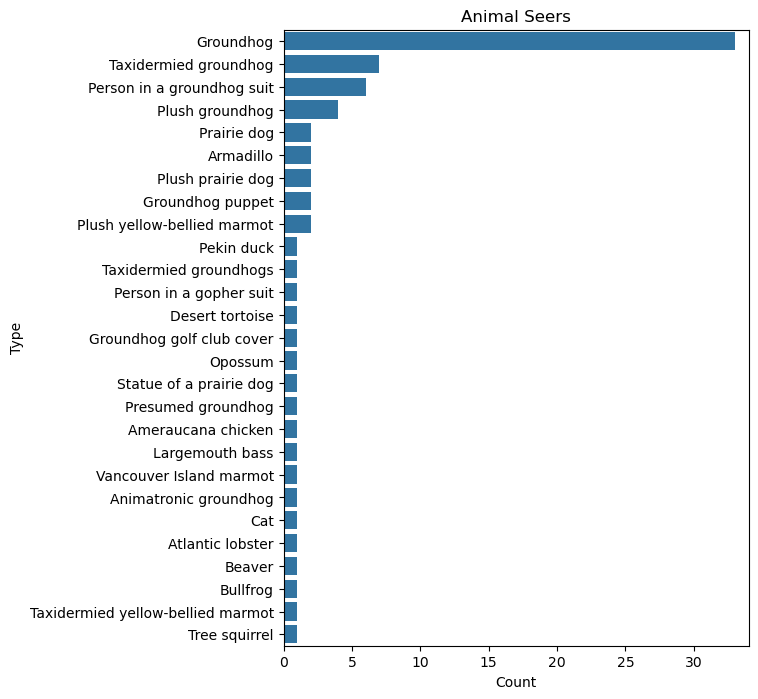

In [26]:
#set plot layout
fig, ax = plt.subplots(figsize=(6, 8))

#creaete plot
ax = sns.barplot(data=animal_type, y='type', x='count', color='tab:blue')

#plot attributes
plt.title('Animal Seers')
plt.xlim(0, animal_type['count'].max() + 1)
plt.xlabel('Count')
plt.ylabel('Type')

plt.show()

In [44]:
#getting % that are actual groundhogs
groundhog_percent = animal_type.loc[animal_type['type'] == 'Groundhog']['count'] / animal_type['count'].sum()
groundhog_percent

0    0.423077
Name: count, dtype: float64

The plot shows the vast majority are indeed groundhogs and the calaculation above confirms ~42% are groundhogs. Interestingly the 2nd highest amount are dead groundhogs and coming in 3rd place are human beings dressed up like groundhogs. A quick scan of the rest is quite amuzing as well.

#### Next, I'd like to see where all these entities are located. Time to map their locations.

In [45]:
#create latitude column
df_api['latitude'] = pd.to_numeric(df_api['coordinates'].str.split(',').str[0])

In [46]:
#create longitude column
df_api['longitude'] = pd.to_numeric(df_api['coordinates'].str.split(',').str[1])

In [47]:
#verify new columns
df_api.head(1)

,id,slug,shortname,name,city,...,description,image,predictionsCount,latitude,longitude
0,1,punxsutawney-phil,Phil,Punxsutawney Phil,Punxsutawney,...,Punxsutawney Phil is a superstar prognosticati...,https://groundhog-day.com/images/ghogs/punxsut...,129,40.931199,-78.962248


#### The below makes use of the folium package.

In [50]:
# Initialize a map; can use any lat/lon; using mean of locations to centralize map
m = folium.Map(location=[df_api['latitude'].mean(), df_api['longitude'].mean()], zoom_start=4)

# Add markers for each animal
# if animal is a groundhog (green marker with paw print)
for _, row in df_api.query('isGroundhog == 1').iterrows():
    folium.Marker([row['latitude'],
                   row['longitude']], 
                  popup = row['slug'],
                 icon = folium.Icon(color='green', icon='paw', prefix='fa')).add_to(m)

# if animal is not a groundhog (blue marker)
for _, row in df_api.query('isGroundhog != 1').iterrows():
    folium.Marker([row['latitude'],
                   row['longitude']], 
                  popup = row['slug'],
                 icon = folium.Icon(color='blue', icon='', prefix='fa')).add_to(m)    
    
# Display the map
m

Most of the groundhogs hang out on the east coast. Doing a few minutes of research, per a [website](https://www.ncwildlife.org/Portals/0/Learning/documents/Profiles/Mammals/Groundhog-Profile.pdf) I found, "Groundhogs are distributed from eastern Alaska across the southern half of Canada to the Atlantic Ocean and south in the eastern half of the United States to Arkansas, Mississippi, Alabama, Georgia, South Carolina and North Carolina."

The non groundhogs are spreadout with Canada getting in on the action.

### Next, I'll go back to each animal's predictions since we ignored it earlier.

In [77]:
#creating another datafrme with the groundhogs dictionary
df_all_predict = pd.DataFrame(resp.json()['groundhogs'])

In [78]:
#iterate through each row to break out each animal into its own dataframe and save to its own file
for _, row in df_all_predict.iterrows():
    #create dataframe for each row using predictions dictionary
    df_all_predict = pd.DataFrame(row['predictions'])
    #add id and slug to dataframe
    df_all_predict = df_all_predict.assign(**row[['id','slug']].to_dict())
    #reorder the columns
    df_all_predict = df_all_predict[['id', 'slug', 'year', 'shadow', 'details']]
    #save each for to its own file
    df_all_predict.to_csv(f'../data/{row["slug"]}.csv', index=False)